# 📚 Plotbot Data Access Patterns Guide

This notebook demonstrates the **correct** ways to access data in Plotbot, including:
1. **Time Series Data** - Different access methods for `mag_rtn_4sa.br`
2. **Spectral Data** - Working with `epad` pitch angle distributions
3. **Plot/Figure Control** - How to return (or not return) plot objects

**Created:** 2025-09-30  
**Purpose:** Reference guide for data access patterns

⚠️ **CRITICAL**: Shows why `.data` property is required for time-clipped data!


In [1]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import plotbot
from plotbot import *



🕒 Starting import timing session: plotbot_full_initialization
  ✅ matplotlib.pyplot: 0.000s
  ✅ numpy: 0.000s
  🔧 Starting block: core_components
initialized server_access
initialized global_tracker
initialized plot_config
initialized plot_manager
initialized epad class
initialized epad_hr class
initialized proton class
initialized proton_hr class
initialized ham_class
initialized psp_alpha class
initialized psp_qtn class
initialized psp_orbit class
initialized psp_span_vdf class
initialized data_cubby.
CDF classes added to data_cubby type map.
  ✅ Block 'core_components' completed in 0.756s
  🔧 Starting block: psp_data_classes
initialized proton_fits class
initialized alpha_fits class
  ✅ Block 'psp_data_classes' completed in 0.002s
  🔧 Starting block: wind_data_classes
  ✅ Block 'wind_data_classes' completed in 0.000s
  🔧 Starting block: data_cubby_registration
  ✅ Block 'data_cubby_registration' completed in 0.001s
  🔧 Starting block: auto_register_custom_classes
  ✅ Block 'auto_re

---
## 🔵 Part 1: Time Series Data Access (mag_rtn_4sa.br)

### 📊 Understanding What Different Access Methods Return

When you call `plotbot()` multiple times with **different time ranges**, Plotbot:
1. **Downloads** new data if needed
2. **MERGES** it with existing data in the data cubby (accumulates ALL data!)
3. Different access methods return **different views** of this data

### What Each Method Returns:
```python
# After 2 plotbot calls with different tranges:
mag_rtn_4sa.br              # Returns: ALL merged data (32,959 points)
np.array(mag_rtn_4sa.br)    # Returns: ALL merged data (32,959 points)
mag_rtn_4sa.br.data         # Returns: Time-clipped data (16,480 points for trange2)
mag_rtn_4sa.br.all_data     # Returns: ALL merged data (32,959 points)
```

**None of these are "wrong" - they just return different things!**  
**Choose based on what you need.**

Let's demonstrate this step-by-step...


In [ ]:
# Define two NON-OVERLAPPING time ranges (separated by 2 hours)
trange1 = ['2021-01-19/02:00:00', '2021-01-19/03:00:00']  # 1 hour
trange2 = ['2021-01-19/05:00:00', '2021-01-19/06:00:00']  # 1 hour, 2 hours later

print("📅 Test Setup:")
print(f"   trange1: {trange1[0]} to {trange1[1]}")
print(f"   trange2: {trange2[0]} to {trange2[1]}")
print(f"   Gap: 2 hours - data will NOT overlap")


📅 Test Setup:
   trange1: 2021-01-19/02:00:00 to 2021-01-19/03:00:00
   trange2: 2021-01-19/05:00:00 to 2021-01-19/06:00:00
   Gap: 2 hours - data will NOT overlap



🔵 FIRST PLOTBOT CALL (trange1)
🤖 Plotbot starting (loading scientific libraries)...
🤖 Plotbot libraries loaded, proceeding...
🛰️ mag_RTN_4sa - acquiring variables: br
 
[CUBBY] 
=== Retrieving mag_rtn_4sa from data_cubby ===
[CUBBY] GRAB CALLER: /Users/robertalexander/GitHub/Plotbot/plotbot/plotbot_main.py:365
[CUBBY] GRAB SUCCESS - Retrieved mag_rtn_4sa with type <class 'plotbot.data_classes.psp_mag_rtn_4sa.mag_rtn_4sa_class'>
[CUBBY] [CUBBY_GRAB_RETURN_STATE] Object ID 6023637152 for key 'mag_rtn_4sa'. dt_len: None_or_NoAttr, min: N/A, max: N/A
[CUBBY] GRAB OUTPUT - No datetime_array attribute found
[CUBBY] GRAB OUTPUT - raw_data keys=['all', 'br', 'bt', 'bn', 'bmag', 'pmag', 'br_norm'] | all: type=NoneType, shape=N/A | br: type=NoneType, shape=N/A | bt: type=NoneType, shape=N/A | bn: type=NoneType, shape=N/A | bmag: type=NoneType, shape=N/A | pmag: type=NoneType, shape=N/A | br_norm: type=NoneType, shape=N/A
[CUBBY] === End Retrieval Debug (LEAVING DATA CUBBY)===

📥 Acquiring data 

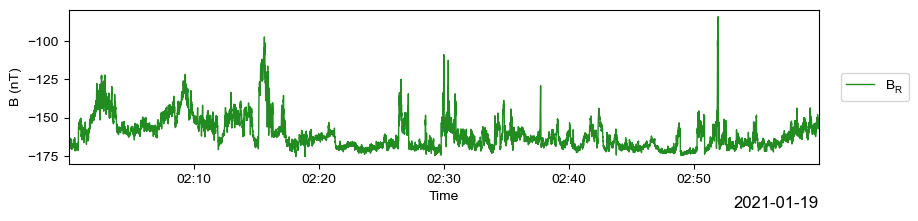

In [3]:
# Enable debug output to see what's happening
print_manager.show_data_cubby = True
print_manager.show_status = True
print_manager.show_debug = False

# FIRST PLOTBOT CALL
print("\n" + "="*80)
print("🔵 FIRST PLOTBOT CALL (trange1)")
print("="*80)

plotbot(trange1, mag_rtn_4sa.br, 1);


In [ ]:
# Access data using different methods
print("\n📊 After trange1 - Testing Access Methods:")

# Method 1: .data property (time-clipped)
data_1 = mag_rtn_4sa.br.data
print(f"\n1️⃣ mag_rtn_4sa.br.data → {len(data_1):,} points (time-clipped)")

# Method 2: Direct array access (full underlying array)
direct_1 = np.array(mag_rtn_4sa.br)
print(f"2️⃣ np.array(mag_rtn_4sa.br) → {len(direct_1):,} points (full array)")

# Method 3: .all_data property (all accumulated data)
all_data_1 = mag_rtn_4sa.br.all_data
print(f"3️⃣ mag_rtn_4sa.br.all_data → {len(all_data_1):,} points (all data)")

print(f"\n   All methods return same length? {len(data_1) == len(direct_1) == len(all_data_1)}")
print(f"   ℹ️ After FIRST call, all methods return the same (only 1 trange loaded)")



📊 After trange1 - Testing Access Methods:

1️⃣ mag_rtn_4sa.br.data → 16,479 points (time-clipped)
2️⃣ np.array(mag_rtn_4sa.br) → 16,479 points (full array)
3️⃣ mag_rtn_4sa.br.all_data → 16,479 points (all data)

   All methods return same length? True
   ℹ️ After FIRST call, all methods return the same (only 1 trange loaded)



🟢 SECOND PLOTBOT CALL (trange2 - DIFFERENT TIME!)
⚠️ Watch for: 'ULTIMATE MERGE ENGINE' and 'NO OVERLAP - Simple concatenation'
   This means data cubby will MERGE both time ranges!

🤖 Plotbot starting (loading scientific libraries)...
🤖 Plotbot libraries loaded, proceeding...
🛰️ mag_RTN_4sa - acquiring variables: br
 
[CUBBY] 
=== Retrieving mag_rtn_4sa from data_cubby ===
[CUBBY] GRAB CALLER: /Users/robertalexander/GitHub/Plotbot/plotbot/plotbot_main.py:365
[CUBBY] GRAB SUCCESS - Retrieved mag_rtn_4sa with type <class 'plotbot.data_classes.psp_mag_rtn_4sa.mag_rtn_4sa_class'>
[CUBBY] [CUBBY_GRAB_RETURN_STATE] Object ID 6023637152 for key 'mag_rtn_4sa'. dt_len: 16479, min: 2021-01-19T02:00:00.107029632, max: 2021-01-19T02:59:59.792199936
[CUBBY] GRAB OUTPUT - datetime_array type=ndarray, elem_type=datetime64, shape=(16479,), range=2021-01-19T02:00:00.107029 to 2021-01-19T02:59:59.792199
[CUBBY] GRAB OUTPUT - raw_data keys=['all', 'br', 'bt', 'bn', 'bmag', 'pmag', 'br_norm'] | all(list

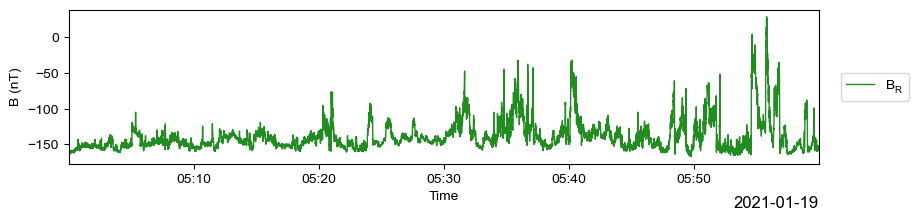

In [ ]:
# SECOND PLOTBOT CALL - DIFFERENT TIME RANGE!
print("\n" + "="*80)
print("🟢 SECOND PLOTBOT CALL (trange2 - DIFFERENT TIME!)")
print("="*80)
print("⚠️ Watch for: 'ULTIMATE MERGE ENGINE' and 'NO OVERLAP - Simple concatenation'")
print("   This means data cubby will MERGE both time ranges!\n")

fig2 = plotbot(trange2, mag_rtn_4sa.br, 1)


In [ ]:
# THE KEY COMPARISON
print("\n" + "="*80)
print("📊 KEY DIFFERENCE: What Does Each Method Return After trange2?")
print("="*80)

# Method 1: .data property (time-clipped to requested trange)
data_2 = mag_rtn_4sa.br.data
times_2 = mag_rtn_4sa.br.datetime_array

print(f"\n1️⃣ mag_rtn_4sa.br.data:")
print(f"   Points: {len(data_2):,}")
print(f"   First timestamp: {times_2[0]}")
print(f"   Last timestamp: {times_2[-1]}")
print(f"   → Returns ONLY data for trange2 (time-clipped)")

# Method 2: Direct array access (returns underlying full array)
direct_2 = np.array(mag_rtn_4sa.br)

print(f"\n2️⃣ np.array(mag_rtn_4sa.br):")
print(f"   Points: {len(direct_2):,}")
print(f"   → Returns {len(direct_2):,} = {len(data_1):,} (trange1) + {len(data_2):,} (trange2)")
print(f"   → Returns ALL data from both time ranges (merged)")

# Method 3: .all_data (explicitly returns all data)
all_data_2 = mag_rtn_4sa.br.all_data

print(f"\n3️⃣ mag_rtn_4sa.br.all_data:")
print(f"   Points: {len(all_data_2):,}")
print(f"   → Returns ALL cached data (same as direct access)")



📊 KEY DIFFERENCE: What Does Each Method Return After trange2?

1️⃣ mag_rtn_4sa.br.data:
   Points: 16,480
   First timestamp: 2021-01-19T05:00:00.036110080
   Last timestamp: 2021-01-19T05:59:59.939557888
   → Returns ONLY data for trange2 (time-clipped)

2️⃣ np.array(mag_rtn_4sa.br):
   Points: 32,959
   → Returns 32,959 = 16,479 (trange1) + 16,480 (trange2)
   → Returns ALL data from both time ranges (merged)

3️⃣ mag_rtn_4sa.br.all_data:
   Points: 32,959
   → Returns ALL cached data (same as direct access)


### 📋 Summary Table


In [ ]:
print("\n" + "="*80)
print("📋 SUMMARY: Data Access Methods - What Each Returns")
print("="*80 + "\n")

summary = pd.DataFrame({
    'Access Method': [
        'mag_rtn_4sa.br.data',
        'mag_rtn_4sa.br.datetime_array',
        'np.array(mag_rtn_4sa.br)',
        'mag_rtn_4sa.br.all_data'
    ],
    'After trange1': [
        f"{len(data_1):,}",
        f"{len(data_1):,}",
        f"{len(direct_1):,}",
        f"{len(all_data_1):,}"
    ],
    'After trange2': [
        f"{len(data_2):,}",
        f"{len(times_2):,}",
        f"{len(direct_2):,}",
        f"{len(all_data_2):,}"
    ],
    'What It Returns': [
        'Time-clipped to trange',
        'Time-clipped to trange',
        'Full underlying array',
        'Full underlying array'
    ],
    'Use When': [
        'Want current trange only',
        'Want current trange times',
        'Want all accumulated data',
        'Want all accumulated data'
    ]
})

print(summary.to_string(index=False))

print("\n💡 KEY INSIGHT:")
print("   • If you want data for the CURRENT trange → use .data")
print("   • If you want ALL accumulated data → use np.array() or .all_data")
print("   • Neither is 'wrong' - they serve different purposes!")



📋 SUMMARY: Data Access Methods - What Each Returns

                Access Method After trange1 After trange2        What It Returns                  Use When
          mag_rtn_4sa.br.data        16,479        16,480 Time-clipped to trange  Want current trange only
mag_rtn_4sa.br.datetime_array        16,479        16,480 Time-clipped to trange Want current trange times
     np.array(mag_rtn_4sa.br)        16,479        32,959  Full underlying array Want all accumulated data
      mag_rtn_4sa.br.all_data        16,479        32,959  Full underlying array Want all accumulated data

💡 KEY INSIGHT:
   • If you want data for the CURRENT trange → use .data
   • If you want ALL accumulated data → use np.array() or .all_data
   • Neither is 'wrong' - they serve different purposes!
